In [1]:
%matplotlib inline


# Assignment: Label Propagation

Comparison for decision boundary generated on dataset between Label Propagation and another model, e.g. SVM.


The assignment will require following code from this tutorial: https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_semi_supervised_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-semi-supervised-versus-svm-iris-py


First, study the code linked at the above tutorial. It shows the performance of Label Propagation in finding the boundaries between the classes in the IRIS dataset. And compares the performance against SVM. 

## Question 1 (2points): 


We will instead work on the WINE dataset. It is one of the standard datasets available in sklearn.
Add code below to load the wine dataset and print its description.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading
# from sklearn.semi_supervised import SelfTrainingClassifier

rng = np.random.RandomState(0)

wine = datasets.load_wine()

In [3]:
print(wine.DESCR) 

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Question 2 (2 points)

Set the X and y from the loaded dataset. 
X should be the first two columns of the dataset and y should be the pre-determined target variable in the wine data. 

In [4]:
X = wine.data[:, :2]
print("Here is X: \n", X)
y = wine.target
print("Here is y: \n", y)

Here is X: 
 [[14.23  1.71]
 [13.2   1.78]
 [13.16  2.36]
 [14.37  1.95]
 [13.24  2.59]
 [14.2   1.76]
 [14.39  1.87]
 [14.06  2.15]
 [14.83  1.64]
 [13.86  1.35]
 [14.1   2.16]
 [14.12  1.48]
 [13.75  1.73]
 [14.75  1.73]
 [14.38  1.87]
 [13.63  1.81]
 [14.3   1.92]
 [13.83  1.57]
 [14.19  1.59]
 [13.64  3.1 ]
 [14.06  1.63]
 [12.93  3.8 ]
 [13.71  1.86]
 [12.85  1.6 ]
 [13.5   1.81]
 [13.05  2.05]
 [13.39  1.77]
 [13.3   1.72]
 [13.87  1.9 ]
 [14.02  1.68]
 [13.73  1.5 ]
 [13.58  1.66]
 [13.68  1.83]
 [13.76  1.53]
 [13.51  1.8 ]
 [13.48  1.81]
 [13.28  1.64]
 [13.05  1.65]
 [13.07  1.5 ]
 [14.22  3.99]
 [13.56  1.71]
 [13.41  3.84]
 [13.88  1.89]
 [13.24  3.98]
 [13.05  1.77]
 [14.21  4.04]
 [14.38  3.59]
 [13.9   1.68]
 [14.1   2.02]
 [13.94  1.73]
 [13.05  1.73]
 [13.83  1.65]
 [13.82  1.75]
 [13.77  1.9 ]
 [13.74  1.67]
 [13.56  1.73]
 [14.22  1.7 ]
 [13.29  1.97]
 [13.72  1.43]
 [12.37  0.94]
 [12.33  1.1 ]
 [12.64  1.36]
 [13.67  1.25]
 [12.37  1.13]
 [12.17  1.45]
 [12.37  1.2

## Question 3 (6 points)

Similar to the code in the tutorial linked above, create three versions of the label propagation algorithm. 
However, your label propagation should start with **10%, 30% and 50%** of the data labeled.

Similar to the code in tutorial linked above, compare the performance of the label propagation algorithms to an SVM classifier with RBF kernel. 

You should output four plots as shown in sample output below.

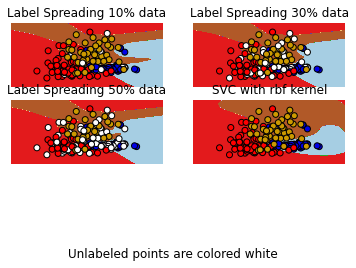

In [5]:
from sklearn.svm import SVC

h = .02

y_rand = rng.rand(y.shape[0])
y_10 = np.copy(y)
y_10[y_rand < 0.1] = -1  # set random samples to be unlabeled
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls10 = (LabelSpreading().fit(X, y_10), y_10, 'Label Spreading 10% data')
ls30 = (LabelSpreading().fit(X, y_30), y_30, 'Label Spreading 30% data')
ls50 = (LabelSpreading().fit(X, y_50), y_50, 'Label Spreading 50% data')

rbf_svc = (SVC(kernel='rbf', gamma=.5).fit(X, y), y, 'SVC with rbf kernel')

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

# classifiers = (ls10, st10, ls30, st30, ls50, st50)
classifiers = (ls10, ls30, ls50, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

## Question 4 (5 points):

What can you observe in terms of performance for the 4 algorithms above? Which label propagation works better? Does more labeled data help with the final performance?

Write at least **50 words**. 